In [1]:
!pip3 uninstall -y tfrecord

Found existing installation: tfrecord 1.13
Uninstalling tfrecord-1.13:
  Successfully uninstalled tfrecord-1.13


In [2]:
!pip3 show tfrecord

In [3]:
!pip3 install git+https://github.com/tomaszbochenski/tfrecord.git@RLUnplugged_Atari_support

  Cloning https://github.com/tomaszbochenski/tfrecord.git (to revision RLUnplugged_Atari_support) to /tmp/pip-req-build-d4b7p9rc
  Created wheel for tfrecord: filename=tfrecord-1.13-py3-none-any.whl size=15385 sha256=ccc37ce2f3afd4e5c653596f54db5ab65c96568cb6a80772ea2c7f945e730964
  Stored in directory: /tmp/pip-ephem-wheel-cache-oxmi_8mq/wheels/62/9c/d1/c537471c58a004dd8f6a10967c64675059c1f967df4c7bd0c2
Successfully built tfrecord


In [4]:
ACTIONS = [
    "noop", "fire", "up", "right", "left", "down", "up-right", "up-left",
    "down-right", "down-left", "up-fire", "right-fire", "left-fire","down-fire",
    "up-right-fire", "up-left-fire", "down-right-fire", "down-left-fire"
]

In [5]:
from tfrecord.torch.dataset import MultiTFRecordDataset
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
def show_state(state, pad=2):
    frames = [Image.fromarray(state[:, :, i], "L") for i in range(state.shape[2])]
    width, height = frames[0].size
    dst = Image.new("L", ((width + 2) * len(frames) - 2, height))
    for idx, fr in enumerate(frames):
        dst.paste(fr, (idx * (width + 2), 0))
    plt.figure(figsize = (15,10))
    plt.imshow(dst, cmap="gray")

In [7]:
tfrecord_pattern = "gs://rl_unplugged/atari/Seaquest/run_1-{}-of-00100"
index_pattern = None
splits = {
    "00000": 1/3,
    "00001": 1/3,
    "00002": 1/3,
}
description = None
shuffle_queue_size = 1024
compression_type = "GZIP"

In [8]:
dataset = MultiTFRecordDataset(
    data_pattern=tfrecord_pattern,
    index_pattern=index_pattern, 
    splits=splits,
    description=description,
    shuffle_queue_size=shuffle_queue_size,
    compression_type=compression_type,
)

In [9]:
transition = next(iter(dataset))

### Observation at time t

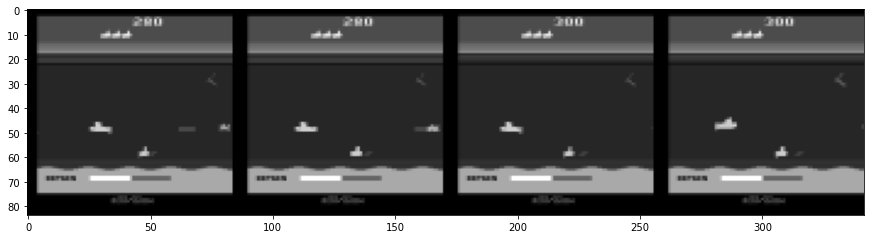

In [10]:
show_state(transition['o_t'])

### Observation at time t+1

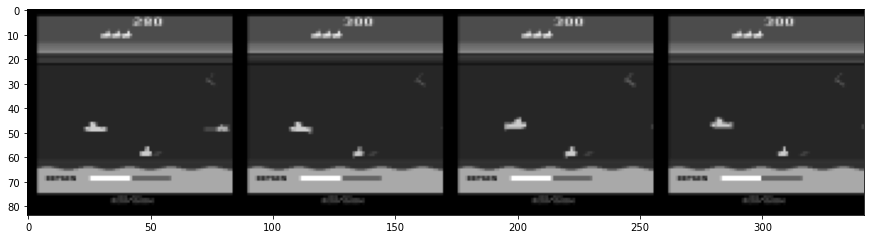

In [11]:
show_state(transition["o_tp1"])

### Action at time t

In [12]:
ACTIONS[transition["a_t"][0]]

'left'

### Action at time t+1

In [13]:
ACTIONS[transition["a_tp1"][0]]

'up-right'

### Reward at time t

In [14]:
transition["r_t"][0]

0.0

### Discount at time t

In [15]:
transition["d_t"][0]

1.0

### Episode ID

In [16]:
transition["episode_id"][0]

6886540391923843073

### Episode return

In [17]:
transition["episode_return"][0]

53.0